# Preliminary EDA for Recipe Recommendation System - dataset from Epicurious.com

# Table of Contents
- [Preliminary EDA for Recipe Recommendation System - dataset from Epicurious.com](#preliminary-eda-for-recipe-recommendation-system---dataset-from-epicurious.com)
  - [Introduction](#introduction)
    - [Dataset](#dataset)
    - [Goals](#goals)
  - [EDA](#eda)
    - [Load the data](#load-the-data)
    - [Check for missing and duplicate values](#check-for-missing-and-duplicate-values)
      - [Drop rows with null values](#drop-rows-with-null-values)
    - [Distribution of data](#distribution-of-data)
  - [Findings](#findings)
  - [Concerns and Questions](#concerns-and-questions)
  - [Data Dictionary](#data-dictionary)
  - [Drop columns and create a cleaned dataframe](#drop-columns-and-create-a-cleaned-dataframe)


## Introduction

### Dataset

In this notebook, we will be conducting an EDA for the data set downloaded from https://www.kaggle.com/datasets/hugodarwood/epirecipes. (This has Id = 2 in my [Datasets Shortlist](https://docs.google.com/spreadsheets/d/1ldHpPRw_h2igZUgrDVV3-4N8vYuZXxyOC60sUJlbb7E/)))  

The downloaded folder contains 4 files:
- full_format_recipes.json
- recipe.py
- utils.py
- epi_r.csv

Kaggle.com has the following information on the dataset:  
*Over 20k recipes listed by recipe rating, nutritional information and assigned category (sparse).*  
*Use the 'full_format_recipes.json' file to interact with all recipe data, 'epi_r.csv' drops ingredients and directions in favour of sparse category dummies.*

### Goals

1. Find out whether the dataset contains the following things:
    1. Ingredient lists
    2. Calorie info / Nutrition info
    3. Serving size
    4. Ratings
    5. Recipe steps / instructions
    6. Quantity of each ingredient
2. See cleanliness of data in terms of missing values.
3. Check the distribution of relevant variables.
4. Create a data dictionary.

## EDA

### Load the data

In [5]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
f"pandas version: {pd.__version__}"

'pandas version: 2.1.4'

In [7]:
# Read epi_r.csv into a DataFrame
#df_epi_r = pd.read_csv('../data/raw/epi_r.csv')
#df_epi_r.shape

epi_r has 20052 rows and 680 columns.

In [8]:
# Read full_format_recipes.json into a DataFrame
df_epi_json = pd.read_json('../data/raw/full_format_recipes.json')
df_epi_json.shape

(20130, 11)

epi_json has 20130 rows and 11 columns. Let's look at the columns.

In [9]:
df_epi_json.columns

Index(['directions', 'fat', 'date', 'categories', 'calories', 'desc',
       'protein', 'rating', 'title', 'ingredients', 'sodium'],
      dtype='object')

Columns:  
['directions', 'fat', 'date', 'categories', 'calories', 'desc', 'protein', 'rating', 'title', 'ingredients', 'sodium']

Columns of interest to us:  
['directions',  
'calories',  
'desc',  
'rating',  
'ingredients']

In [10]:
# Let's see some sample rows for epi_json
df_epi_json.sample(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
15862,[Scrape seeds from vanilla bean into heavy med...,NaN,2004-08-20 04:00:00+00:00,"[Berry, Dairy, Egg, Fruit, Dessert, Freeze/Chi...",NaN,Make these with fresh rhubarb when it is in se...,NaN,5.000,Double-Decker Rhubarb Ice Cream Sandwiches,"[1 vanilla bean, split lengthwise, 5 cups 1/2-...",NaN
16320,[Stir fennel seeds in large nonstick skillet o...,NaN,2007-10-30 14:37:17+00:00,"[Sauté, Quick & Easy, Low Cal, Dinner, Salmon,...",NaN,Fresh fennel and fennel seeds flavor this eleg...,NaN,5.000,Salmon with Fennel and Pernod,"[1 1/2 teaspoons fennel seeds, crushed, 1/4 cu...",NaN
14554,[In a dry heavy saucepan (about 3-quart capaci...,0.0,2004-08-20 04:00:00+00:00,"[Sauce, Dessert, Quick & Easy, Low Sodium, Apr...",121.0,Can be prepared in 45 minutes or less.,1.0,3.750,Apricot Caramel Sauce,"[1 cup sugar, 4 cups water, 1 cup firmly packe...",6.0
14614,[Combine all ingredients in a cocktail shaker ...,2.0,2004-08-20 20:58:12+00:00,"[Gin, Milk/Cream, Alcoholic, Egg, Cocktail Par...",187.0,None,3.0,0.000,Café de Paris,"[2 ounces gin, 3 dashes Pernod, 1 teaspoon hea...",47.0
17900,[Heat the vegetable oil in a Dutch oven. Stir ...,45.0,1999-01-22 04:00:00+00:00,"[Soup/Stew, Bean, Beef, Olive, Pork, Rice, Tom...",913.0,None,60.0,4.375,Havana Moon Chili,"[2 tablespoons vegetable oil, 1/2 cup chopped ...",1294.0


**Note**
1. Contains calories.
2. Does NOT contain serving size.
3. Contains rating.
4. `ingredients` has:
    1. List of ingredients
    2. Quantity of each ingredient
    3. Measurement of each ingredient
5. `directions` contains the steps for the recipe.

In [11]:
# Let's look at one row in detail
df_epi_json.loc[0,:].values

array([list(['1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.', '2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.', '3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.']),
       7.0, Timestamp('2006-09-01 04:00:00+0000', tz='UTC'),
       list(['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turkey', 'Vege

In [12]:
# Let's look at the one-hot encoded sample from epi_r
#df_epi_r.sample(5)

In [13]:
#df_epi_r.columns.values

In [14]:
#"title" in df_epi_r.columns

In [15]:
#"rating" in df_epi_r.columns

In [16]:
#df_epi_r.rating.unique()

In [17]:
#df_epi_r.yogurt.unique() # we lose information about quantities in this one-hot encoded form

**Note**  
We lose information about ingredient measurements in this one-hot encoded form.

### Check for missing and duplicate values

Let's check for missing values in epi_json

In [18]:
df_epi_json.isna().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

Many of our columns of interest have null values. Let's see the percentage of missing values.

In [19]:
(df_epi_json.isna().sum()/df_epi_json.shape[0]*100.0).sort_values(ascending=False)

desc           32.960755
fat            20.973671
protein        20.869349
sodium         20.645802
calories       20.635867
rating          0.149031
directions      0.094386
date            0.094386
categories      0.094386
title           0.094386
ingredients     0.094386
dtype: float64

#### Drop rows with null values

Let's drop the rows with null values for `calories`, `rating`, `directions`,`title`, `ingredients` and see how many rows we are left with.

In [20]:
df_clean = df_epi_json.dropna(subset=['directions','calories','title','ingredients','rating'])

In [21]:
df_clean.isna().sum()

directions        0
fat              68
date              0
categories        0
calories          0
desc           5333
protein          47
rating            0
title             0
ingredients       0
sodium            2
dtype: int64

In [22]:
df_clean.shape

(15969, 11)

**Note**  
The number of rows dropped from 20130 to 15969 after removing null values.

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15969 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   15969 non-null  object             
 1   fat          15901 non-null  float64            
 2   date         15969 non-null  datetime64[ns, UTC]
 3   categories   15969 non-null  object             
 4   calories     15969 non-null  float64            
 5   desc         10636 non-null  object             
 6   protein      15922 non-null  float64            
 7   rating       15969 non-null  float64            
 8   title        15969 non-null  object             
 9   ingredients  15969 non-null  object             
 10  sodium       15967 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.5+ MB


### Distribution of data

(array([1342.,    0.,  126.,   81.,    0.,  412., 1166., 4149., 6569.,
        2124.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

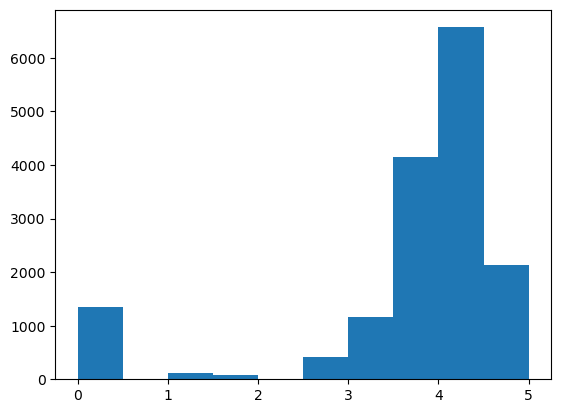

In [24]:
plt.hist(df_clean.rating)

In [25]:
df_clean.rating.unique()

array([2.5  , 4.375, 3.75 , 3.125, 1.875, 5.   , 0.   , 1.25 ])

**Note**  
`Rating` is a float with values ranging from 0 to 5. 

In [26]:
df_clean.rating.value_counts(normalize=True)

rating
4.375    0.411360
3.750    0.259816
5.000    0.133008
0.000    0.084038
3.125    0.073016
2.500    0.025800
1.250    0.007890
1.875    0.005072
Name: proportion, dtype: float64

**Note**  
41% has 4.37 rating  
25% has 3.75 rating  
13% has 5.0 rating  

54% of dataset has rating > 4.0.

In [27]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
fat,15901.0,346.240677,20435.516749,0.0,7.00,17.000,33.000,1722763.0
calories,15969.0,6310.443109,358663.690751,0.0,198.00,331.000,586.000,30111218.0
protein,15922.0,99.982665,3836.459371,0.0,3.00,8.000,27.000,236489.0
rating,15969.0,3.751096,1.298607,0.0,3.75,4.375,4.375,5.0
sodium,15967.0,6213.949208,332963.199777,0.0,80.00,294.000,711.000,27675110.0


## Findings


1. `ingredients` has:
    1. List of ingredients
    2. Quantity of each ingredient
    3. Measurement of each ingredient
2. `directions` contains the steps for the recipe.
3. We lose information about ingredient measurements in the one-hot encoded form of epi_r.csv.
4. The number of rows dropped from 20130 to 15969 after removing null values.
5. `Rating` is a float with values ranging from 0 to 5. 
6. 54% of dataset has rating > 4.0.
7. Summary

|                               |     |
|-------------------------------|-----|
| Ingredient lists              | Yes |
| Calorie info / Nutrition info | Yes |
| Serving size                  | No  |
| Ratings                       | Yes |
| Recipe steps / instructions   | Yes |
| Quantity of each ingredient   | Yes |

## Concerns and Questions

1. The License for the dataset says 'Unknown' on Kaggle. Is this an issue?
2. The size of the dataset seems small ~ 16000 rows.
3. 54% of the dataset has rating > 4.0.
4. One hot encoding lost ingredient amounts.
5. Dataset contains calories but not serving size.

In [28]:
df_clean.isna().sum()

directions        0
fat              68
date              0
categories        0
calories          0
desc           5333
protein          47
rating            0
title             0
ingredients       0
sodium            2
dtype: int64

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15969 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   15969 non-null  object             
 1   fat          15901 non-null  float64            
 2   date         15969 non-null  datetime64[ns, UTC]
 3   categories   15969 non-null  object             
 4   calories     15969 non-null  float64            
 5   desc         10636 non-null  object             
 6   protein      15922 non-null  float64            
 7   rating       15969 non-null  float64            
 8   title        15969 non-null  object             
 9   ingredients  15969 non-null  object             
 10  sodium       15967 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.5+ MB


In [30]:
df_clean.sample(3)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
603,[Char peppers over gas flame or in broiler unt...,59.0,2005-08-01 16:01:17+00:00,"[Sandwich, Beef, Egg, Brie, Bell Pepper, Summe...",1080.0,None,55.0,3.750,"Grilled Steak Sandwiches with Brie, Roasted Pe...","[3 large red bell peppers, 1 2-pound beef tend...",1168.0
15458,"[Using smoothie or ice crush setting, purée ba...",4.0,2016-01-01 19:41:00+00:00,"[Bon Appétit, Smoothie, Banana, Coffee, Date, ...",124.0,This power-breakfast smoothie will be extra sm...,3.0,5.000,"Banana, Coffee, Cashew, and Cocoa Smoothie","[1 banana, preferably frozen, 2 Medjool dates,...",32.0
2917,[Melt butter in a large nonstick skillet over ...,14.0,2004-08-20 04:00:00+00:00,"[Herb, Shellfish, Sauté, Quick & Easy, Basil, ...",256.0,This American variation of a Chinese stir-fry—...,19.0,4.375,Shrimp and Corn with Basil,"[2 tablespoons unsalted butter, Kernels from 2...",659.0


In [31]:
df_clean.shape

(15969, 11)

## Data Dictionary

| Column      | Non-Null Count | Dtype               | Description                                     |
|-------------|----------------|---------------------|-------------------------------------------------|
| ------      | -------------- | -----               | ------                                          |
| title       | 15969 non-null | object              | Title of the recipe                             |
| directions  | 15969 non-null | object              | Steps for the recipe                            |
| ingredients | 15969 non-null | object              | Ingredients plus description of how to cut them |
| categories  | 15969 non-null | object              | Array of categories                             |
| calories    | 15969 non-null | float64             | Calories                                        |
| rating      | 15969 non-null | float64             | Rating on a scale of 0 to 5                     |
| desc        | 10636 non-null | object              | Extra tidbits about the recipe etc.             |
| date        | 15969 non-null | datetime64[ns, UTC] | Date the recipe was created                     |
| sodium      | 15967 non-null | float64             | Sodium content                                  |
| fat         | 15901 non-null | float64             | Fat content                                     |
| protein     | 15922 non-null | float64             | Protein content                                 |

## Drop columns and create a cleaned dataframe

Columns that are relevant to us:

`title`, `directions`, `ingredients`, `categories`, `calories`, `rating`

We will drop the other columns

In [32]:
final_df = df_clean.drop(columns=["desc","sodium","fat","protein"])

In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15969 entries, 0 to 20129
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   15969 non-null  object             
 1   date         15969 non-null  datetime64[ns, UTC]
 2   categories   15969 non-null  object             
 3   calories     15969 non-null  float64            
 4   rating       15969 non-null  float64            
 5   title        15969 non-null  object             
 6   ingredients  15969 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 998.1+ KB


In [34]:
final_df.isna().sum().sum()

0

In [35]:
final_df.to_csv("../data/interim/full_format_recipes_cleaned.csv")